# Predicción mediante técnicas de IA - Trabajo final - Cuaderno de análisis exploratorio y preprocesamiento de los datos

Realizado por

* Manuel Alejandro De la Rosa Gómez
* Diego Alejandro Campuzano Botero
* Gabriel Jaime Orrego Restrepo

Reglas generales:

1. Cada columna de valores, tiene una correspondiente columna de calidad
2. Si el valor es -9999, se considera valor faltante
3. Si la CALIDAD del valor es mayor a 4, se considera valor faltante

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import scipy.stats as stats
from preprocessing_functions import (
    drop_serial_code, 
    drop_nulls_columns,
    drop_quality_columns
)
from plotting_functions import (
    plot_histograms,
    plot_box_and_whiskers
)

In [30]:
df=pd.read_csv('input/raw/SIATA/joint_data/28.csv')

# Descarte de filas con calidad baja

Se procede a descartar del dataset original proporcionado por el SIATA las variables que no contienen ningún valor válido y se recodifican los valores faltantes o no válidos

In [31]:
df.columns

Index(['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [32]:
df = drop_serial_code(df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha_Hora            62112 non-null  object 
 1   pm25                  62112 non-null  float64
 2   calidad_pm25          62112 non-null  float64
 3   pm10                  62112 non-null  float64
 4   calidad_pm10          62112 non-null  float64
 5   pm1                   62112 non-null  float64
 6   calidad_pm1           62112 non-null  float64
 7   no                    62112 non-null  float64
 8   calidad_no            62112 non-null  float64
 9   no2                   62112 non-null  float64
 10  calidad_no2           62112 non-null  float64
 11  nox                   62112 non-null  float64
 12  calidad_nox           62112 non-null  float64
 13  ozono                 62112 non-null  float64
 14  calidad_ozono         62112 non-null  float64
 15  co                 

In [34]:
# # Replace -9999 with NaN
df.replace(-9999.0, np.nan, inplace=True)

In [35]:
# Get the percentage of missing values by column
missing_values = df.isnull().mean() * 100

In [36]:
missing_values

Fecha_Hora                0.000000
pm25                      1.056157
calidad_pm25              0.019320
pm10                    100.000000
calidad_pm10              0.019320
pm1                     100.000000
calidad_pm1               0.019320
no                        2.817491
calidad_no                0.019320
no2                       2.817491
calidad_no2               0.019320
nox                       2.817491
calidad_nox               0.019320
ozono                   100.000000
calidad_ozono             0.019320
co                      100.000000
calidad_co                0.019320
so2                      75.935407
calidad_so2               0.019320
pst                     100.000000
calidad_pst               0.019320
dviento_ssr               3.910677
calidad_dviento_ssr       0.019320
haire10_ssr               3.802808
calidad_haire10_ssr       0.019320
p_ssr                     3.802808
calidad_p_ssr             0.019320
pliquida_ssr            100.000000
calidad_pliquida_ssr

In [37]:
df.sample(10)

,Fecha_Hora,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,no2,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
42554,2022-11-09 02:00:00,14.0,1.0000,NaN,1.0,NaN,1.0,42.34660,1.00,11.6468,...,636.500,1.00,NaN,1.0,0.000,1.00,16.9000,1.00,0.000000,1.00
24975,2020-11-06 15:00:00,10.0,1.0000,NaN,1.0,NaN,1.0,10.49390,1.00,11.8212,...,633.200,1.00,NaN,1.0,330.210,1.00,26.3000,1.00,1.100000,1.00
27382,2021-02-14 22:00:00,19.0,1.0000,NaN,1.0,NaN,1.0,106.58000,3.10,2.7030,...,637.000,1.00,NaN,1.0,0.000,1.00,20.0000,1.00,0.500000,1.00
54441,2024-03-18 09:00:00,47.0,1.0000,NaN,1.0,NaN,1.0,17.40300,1.80,39.9428,...,636.100,1.00,NaN,1.0,187.660,1.00,25.0000,1.00,0.700000,1.00
14212,2019-08-16 04:00:00,56.0,2.3000,NaN,1.0,NaN,1.0,2.33730,1.00,25.8097,...,636.900,1.00,NaN,1.0,0.000,1.00,18.9000,1.00,0.300000,1.00
54011,2024-02-29 11:00:00,53.0,1.0000,NaN,1.0,NaN,1.0,6.75120,1.00,42.2919,...,636.500,1.00,NaN,1.0,395.360,1.00,26.5000,1.00,0.800000,1.00
8393,2018-12-16 17:00:00,7.0,1.0000,NaN,1.0,NaN,1.0,0.77070,2.10,7.6308,...,633.763,1.00,NaN,1.0,146.433,1.00,28.5919,1.00,1.952230,1.00
2279,2018-04-05 23:00:00,16.0,1.0000,NaN,1.0,NaN,1.0,5.95597,1.00,20.4578,...,637.125,1.00,NaN,1.0,0.000,1.00,16.7046,1.00,0.413009,1.00
51186,2023-11-03 18:00:00,16.0,1.0000,NaN,1.0,NaN,1.0,7.61930,1.80,25.2603,...,633.400,1.00,NaN,1.0,5.810,1.00,22.2000,1.00,1.400000,1.00
18021,2020-01-21 21:00:00,985.0,4.2985,NaN,1.0,NaN,1.0,NaN,4.31,NaN,...,NaN,4.31,NaN,1.0,NaN,4.31,NaN,4.31,NaN,4.31


In [38]:
df = drop_nulls_columns(df)

In [40]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'calidad_pm10', 'calidad_pm1',
       'no', 'calidad_no', 'no2', 'calidad_no2', 'nox', 'calidad_nox',
       'calidad_ozono', 'calidad_co', 'calidad_so2', 'calidad_pst',
       'dviento_ssr', 'calidad_dviento_ssr', 'haire10_ssr',
       'calidad_haire10_ssr', 'p_ssr', 'calidad_p_ssr', 'calidad_pliquida_ssr',
       'rglobal_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [41]:
df = drop_quality_columns(df)

In [42]:
df.columns

Index(['Fecha_Hora', 'pm25', 'calidad_pm25', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'rglobal_ssr', 'calidad_rglobal_ssr', 'taire10_ssr',
       'calidad_taire10_ssr', 'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [43]:
df.shape

(62112, 21)

In [44]:
df.sample(10)

,Fecha_Hora,pm25,calidad_pm25,no,calidad_no,no2,calidad_no2,nox,calidad_nox,dviento_ssr,...,haire10_ssr,calidad_haire10_ssr,p_ssr,calidad_p_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
3580,2018-05-30 04:00:00,20.0,1.0,2.25389,1.0,13.1511,1.0,15.4032,1.0,214.843,...,79.2886,1.00,635.755,1.00,0.000,1.00,18.4964,1.00,0.511048,1.00
56819,2024-06-25 11:00:00,14.0,1.0,14.43170,1.0,17.1334,1.0,31.5651,1.0,313.700,...,60.1000,1.00,637.400,1.00,203.630,1.00,23.0000,1.00,0.000000,1.00
10210,2019-03-02 10:00:00,31.0,1.0,25.98360,2.2,25.5972,1.0,51.5808,2.2,NaN,...,NaN,4.31,NaN,4.31,NaN,4.31,NaN,4.31,NaN,4.31
56306,2024-06-04 02:00:00,15.0,1.0,14.86840,1.0,8.2681,1.0,23.1365,1.0,215.100,...,81.2000,1.00,635.600,1.00,0.000,1.00,20.3000,3.00,0.000000,3.00
38830,2022-06-06 22:00:00,40.0,1.0,57.18760,1.0,31.8473,1.0,89.0349,1.0,213.400,...,72.8000,1.00,637.100,1.00,0.000,1.00,17.7000,1.00,0.400000,1.00
60855,2024-12-10 15:00:00,11.0,1.0,3.66430,2.3,0.8371,1.8,4.5014,1.8,2.600,...,31.2000,1.00,632.600,1.00,223.320,1.00,28.8000,1.00,1.200000,1.00
52268,2023-12-18 20:00:00,8.0,1.0,5.73900,1.8,14.6788,1.8,20.4179,1.8,326.500,...,64.5000,1.00,634.800,1.00,0.000,1.00,22.7000,1.00,3.000000,1.00
35548,2022-01-21 04:00:00,36.0,1.0,5.64350,1.8,14.3604,1.8,20.0039,1.8,203.000,...,77.0000,1.00,634.500,1.00,0.000,1.00,18.6000,1.00,0.100000,1.00
44260,2023-01-19 04:00:00,15.0,1.0,32.96490,1.0,6.1096,1.0,39.0745,1.0,340.800,...,81.3000,1.00,635.400,1.00,0.000,1.00,17.9000,1.00,0.000000,1.00
3370,2018-05-21 10:00:00,15.0,1.0,16.02350,1.0,22.1797,1.0,38.2003,1.0,329.009,...,67.4792,1.00,637.054,1.00,307.786,1.00,21.2171,1.00,1.321250,1.00


In [45]:
df_pm25=df[['Fecha_Hora','pm25', 'calidad_pm25']]

In [46]:
df_pm25[df_pm25['calidad_pm25']>=4]

,Fecha_Hora,pm25,calidad_pm25
109,2018-01-05 13:00:00,NaN,4.31
188,2018-01-08 20:00:00,NaN,4.31
189,2018-01-08 21:00:00,NaN,4.31
190,2018-01-08 22:00:00,NaN,4.31
191,2018-01-08 23:00:00,NaN,4.31
...,...,...,...
62049,2025-01-29 09:00:00,NaN,4.31
62050,2025-01-29 10:00:00,NaN,4.31
62051,2025-01-29 11:00:00,NaN,4.31
62052,2025-01-29 12:00:00,NaN,4.31


In [47]:
# Summarize the data
df.describe()

,pm25,calidad_pm25,no,calidad_no,no2,calidad_no2,nox,calidad_nox,dviento_ssr,calidad_dviento_ssr,haire10_ssr,calidad_haire10_ssr,p_ssr,calidad_p_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
count,61456.000000,62100.000000,60362.000000,62100.000000,60362.000000,62100.000000,60362.000000,62100.000000,59683.000000,62100.000000,59750.000000,62100.000000,59750.000000,62100.000000,59678.000000,62100.000000,59750.000000,62100.000000,59749.000000,62100.000000
mean,28.315421,1.113602,22.606775,1.501262,25.162279,1.443159,61.808253,1.449203,125.015967,1.179819,-20.880984,1.151688,546.401587,1.190112,20.188694,1.154946,-61.932929,1.171173,-83.006966,1.270260
std,96.568308,0.512689,1058.115315,0.805705,1064.763963,0.778090,2643.192293,0.778874,982.499634,0.725734,916.840865,0.689443,968.869560,0.734200,935.479908,0.697048,912.935014,0.712749,910.998493,0.813952
min,-9990.000000,1.000000,-21.164900,1.000000,-19.282600,1.000000,-7.358900,1.000000,-9993.000000,1.000000,-9993.000000,1.000000,-9993.000000,1.000000,-9993.000000,1.000000,-9993.000000,1.000000,-9993.000000,1.000000
25%,14.000000,1.000000,3.130775,1.000000,9.648050,1.000000,16.175600,1.000000,130.614000,1.000000,50.500000,1.000000,634.600000,1.000000,0.000000,1.000000,19.200000,1.000000,0.200000,1.000000
50%,20.000000,1.000000,8.271700,1.000000,15.289250,1.000000,26.059750,1.000000,231.000000,1.000000,67.500000,1.000000,635.600000,1.000000,1.770000,1.000000,21.200000,1.000000,0.600000,1.000000
75%,29.000000,1.000000,21.944500,1.900000,21.561300,1.800000,41.841675,1.800000,329.823500,1.000000,76.431775,1.000000,636.400000,1.000000,166.355000,1.000000,24.500000,1.000000,1.100000,1.000000
max,985.000000,4.310000,229377.000000,4.310000,186048.000000,4.310000,307230.000000,4.310000,360.000000,4.310000,88.349900,4.310000,639.400000,4.310000,822.719000,4.310000,33.400000,4.310000,4.493070,4.310000


In [19]:
# Percentage of data with 'pm25' = -9999
(df['pm25'] == -9999).sum() / len(df) * 100

np.float64(0.0)

In [20]:
# Group data by 'calidad_pm25', count the number of records and show as percentage of total
df_grouped=df.groupby('calidad_pm25').size().reset_index(name='counts')

df_grouped['percentage'] = df_grouped['counts']/df_grouped['counts'].sum()*100

In [21]:
df_grouped

,calidad_pm25,counts,percentage
0,1.0000,58640,94.428341
1,2.0000,48,0.077295
2,2.1000,418,0.673108
3,2.2000,276,0.444444
4,2.3000,828,1.333333
5,2.4000,19,0.030596
6,2.5000,69,0.111111
7,3.0000,110,0.177134
8,3.1000,653,1.051530
9,3.2000,15,0.024155


In [22]:
#elegir las columnas del analisis, en si los datos que se van a usar y no la calidad de los datos
columnas_filtradas= [col for col in df.columns if "calidad" not in col]
df_nuevo = df[columnas_filtradas]

In [23]:
df_nuevo.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'],
      dtype='object')

# Llenado de nulos

Inicialmente se visualizan los datos crudos con histogramas

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Fecha_Hora           62112 non-null  object
 1   pm25                 61456 non-null  object
 2   calidad_pm25         62100 non-null  object
 3   no                   60362 non-null  object
 4   calidad_no           62100 non-null  object
 5   no2                  60362 non-null  object
 6   calidad_no2          62100 non-null  object
 7   nox                  60362 non-null  object
 8   calidad_nox          62100 non-null  object
 9   dviento_ssr          59683 non-null  object
 10  calidad_dviento_ssr  62100 non-null  object
 11  haire10_ssr          59750 non-null  object
 12  calidad_haire10_ssr  62100 non-null  object
 13  p_ssr                59750 non-null  object
 14  calidad_p_ssr        62100 non-null  object
 15  rglobal_ssr          59678 non-null  object
 16  cali

In [25]:
# df_nuevo will be df with the columns that end with _mean, fecha_hora and PM25
# df_nuevo = df[df.columns[df.columns.str.endswith('_mean') | df.columns.isin(['fecha_hora', 'PM25'])]]
df_nuevo = df[df.columns[~df.columns.str.startswith('calidad')]]

In [26]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62112 entries, 0 to 62111
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha_Hora   62112 non-null  object
 1   pm25         61456 non-null  object
 2   no           60362 non-null  object
 3   no2          60362 non-null  object
 4   nox          60362 non-null  object
 5   dviento_ssr  59683 non-null  object
 6   haire10_ssr  59750 non-null  object
 7   p_ssr        59750 non-null  object
 8   rglobal_ssr  59678 non-null  object
 9   taire10_ssr  59750 non-null  object
 10  vviento_ssr  59749 non-null  object
dtypes: object(11)
memory usage: 5.2+ MB


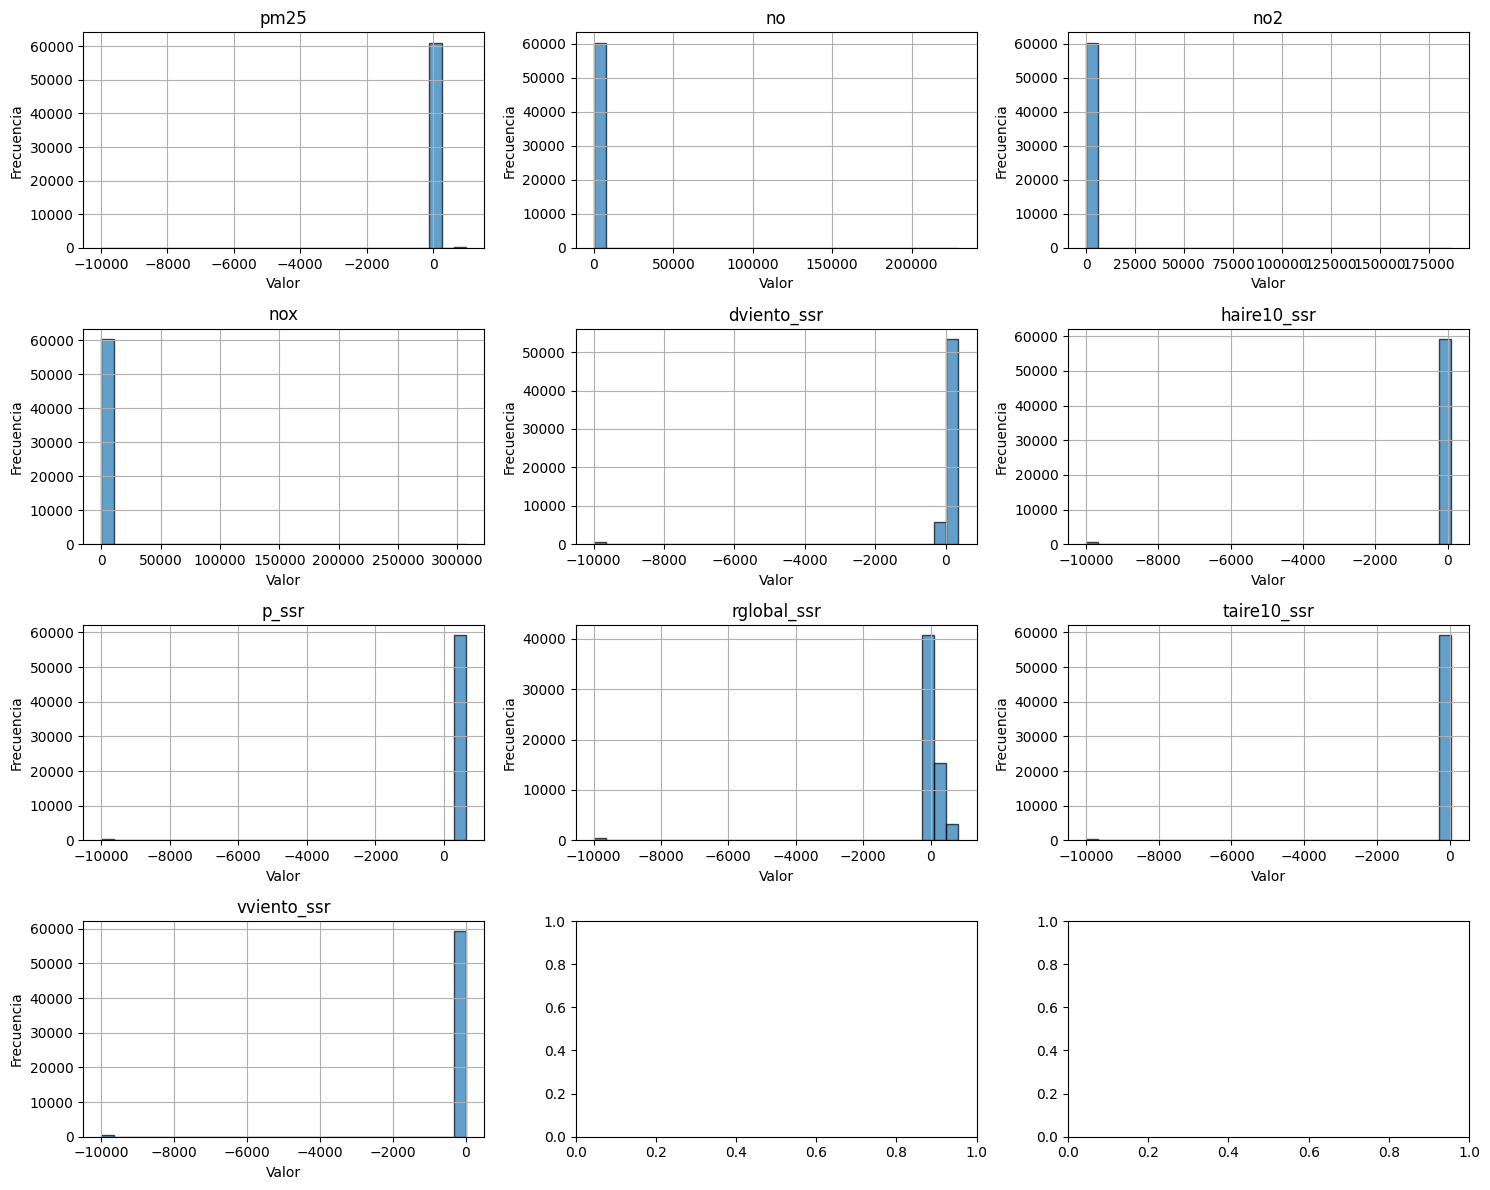

In [27]:
plot_histograms(df_nuevo)

Luego, con diagramas de caja y bigotes.

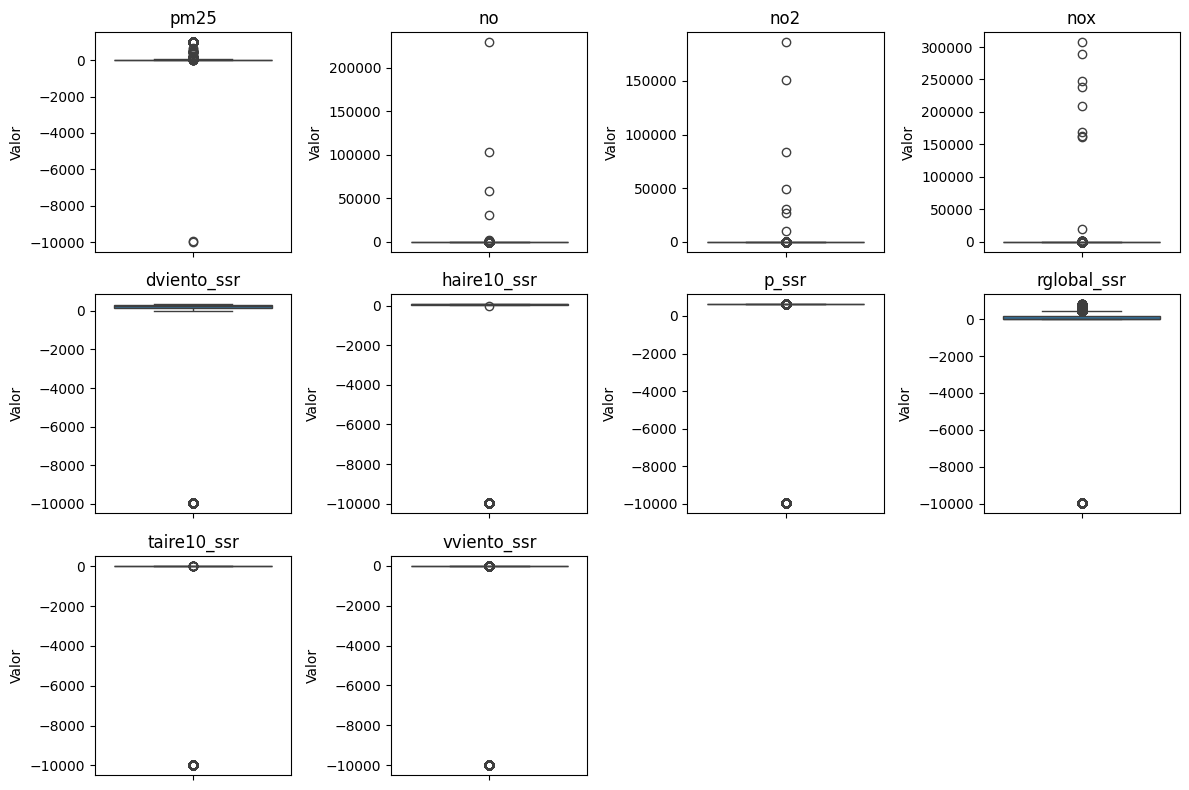

In [28]:
plot_box_and_whiskers(df_nuevo)

Se observan datos atípicos muy alejados de la media, que seguramente corresponden a valores faltantes codificados por el SIATA

## Llenado de nulos con la media mensual (descartando datos atípicos)

In [49]:
df_nuevo['Fecha_Hora'] = pd.to_datetime(df_nuevo['Fecha_Hora'])

# Crear columnas de año y mes
df_nuevo['Año'] = df_nuevo['Fecha_Hora'].dt.year
df_nuevo['Mes'] = df_nuevo['Fecha_Hora'].dt.month

## PM2.5

In [19]:
# Calcular el promedio de PM25 para cada mes, excluyendo valores <= 0
promedios_PM25 = df_nuevo[(df_nuevo['PM25'] > 0) & (df_nuevo['PM25']<80)].groupby(['Año', 'Mes'])['PM25'].mean()

# Función para reemplazar valores de PM25
def reemplazar_PM25(row):
    if pd.isna(row['PM25']) or row['PM25'] <= 0 or row['PM25']>40 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_PM25.get((row['Año'], row['Mes']), row['PM25'])
    return row['PM25']

In [20]:
# Aplicar la función
df_nuevo['PM25'] = df_nuevo.apply(reemplazar_PM25, axis=1)

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\311279900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['PM25'] = df_nuevo.apply(reemplazar_PM25, axis=1)


## NO

In [30]:
# Calcular el promedio de no para cada mes, excluyendo valores <= 0
promedios_no = df_nuevo[(df_nuevo['no'] > 0) & (df_nuevo['no'] < 1000) ].groupby(['Año', 'Mes'])['no'].mean()

# Función para reemplazar valores de no
def reemplazar_no(row):
    if pd.isna(row['no']) or row['no'] <= 0 or row['no'] > 120:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_no.get((row['Año'], row['Mes']), row['no'])
    return row['no']

In [31]:
# Aplicar la función
df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)

/tmp/ipykernel_7443/3827600048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no'] = df_nuevo.apply(reemplazar_no, axis=1)


## NO2

In [32]:
# Calcular el promedio de no2 para cada mes, excluyendo valores <= 0
promedios_no2 = df_nuevo[(df_nuevo['no2'] > 0) & (df_nuevo['no2'] < 50)].groupby(['Año', 'Mes'])['no2'].mean()

# Función para reemplazar valores de pm25
def reemplazar_no2(row):
    if pd.isna(row['no2']) or row['no2'] <= 0 or row['no2'] > 75:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_no2.get((row['Año'], row['Mes']), row['no2'])
    return row['no2']

In [33]:
# Aplicar la función
df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)

/tmp/ipykernel_7443/2813178918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['no2'] = df_nuevo.apply(reemplazar_no2, axis=1)


## NOx

In [34]:
# Calcular el promedio de nox para cada mes, excluyendo valores <= 0
promedios_nox = df_nuevo[(df_nuevo['nox'] > 0)&(df_nuevo['nox'] < 100)].groupby(['Año', 'Mes'])['nox'].mean()

# Función para reemplazar valores de nox
def reemplazar_nox(row):
    if pd.isna(row['nox']) or row['nox'] <= 0 or row['nox'] > 105:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_nox.get((row['Año'], row['Mes']), row['nox'])
    return row['nox']

In [35]:
df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)

/tmp/ipykernel_7443/2350995725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['nox'] = df_nuevo.apply(reemplazar_nox, axis=1)


## Direccion Viento

In [21]:
# Calcular el promedio de Direccion_mean para cada mes, excluyendo valores <= 0
promedios_Direccion_mean = df_nuevo[(df_nuevo['Direccion_mean'] > 0) & (df_nuevo['Direccion_mean'] < 0)].groupby(['Año', 'Mes'])['Direccion_mean'].mean()

# Función para reemplazar valores de Direccion_mean
def reemplazar_Direccion_mean(row):
    if pd.isna(row['Direccion_mean']) or row['Direccion_mean'] <= -360 or row['Direccion_mean'] > 360 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_Direccion_mean.get((row['Año'], row['Mes']), row['Direccion_mean'])
    return row['Direccion_mean']

In [22]:
df_nuevo['Direccion_mean'] = df_nuevo.apply(reemplazar_Direccion_mean, axis=1)

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\2520852629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Direccion_mean'] = df_nuevo.apply(reemplazar_Direccion_mean, axis=1)


## Humedad

In [23]:
# Calcular el promedio de Humedad_mean para cada mes, excluyendo valores <= 0
promedios_Humedad_mean = df_nuevo[df_nuevo['Humedad_mean'] > 0].groupby(['Año', 'Mes'])['Humedad_mean'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_Humedad_mean(row):
    if pd.isna(row['Humedad_mean']) or row['Humedad_mean'] <= 0 or row['Humedad_mean'] > 100:  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_Humedad_mean.get((row['Año'], row['Mes']), row['Humedad_mean'])
    return row['Humedad_mean']

df_nuevo['Humedad_mean'] = df_nuevo.apply(reemplazar_Humedad_mean, axis=1)

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\2262227611.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Humedad_mean'] = df_nuevo.apply(reemplazar_Humedad_mean, axis=1)


## Presion atmosferica

In [24]:
# Calcular el promedio de Presion_mean para cada mes, excluyendo valores <= 0
promedios_Presion_mean = df_nuevo[df_nuevo['Presion_mean'] > 0].groupby(['Año', 'Mes'])['Presion_mean'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_Presion_mean(row):
    if pd.isna(row['Presion_mean']) or row['Presion_mean'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_Presion_mean.get((row['Año'], row['Mes']), row['Presion_mean'])
    return row['Presion_mean']

df_nuevo['Presion_mean'] = df_nuevo.apply(reemplazar_Presion_mean, axis=1)

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\1902937863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Presion_mean'] = df_nuevo.apply(reemplazar_Presion_mean, axis=1)


## Radiacion

In [40]:
# Calcular el promedio de rglobal_ssr para cada mes, excluyendo valores <= 0
promedios_rglobal_ssr = df_nuevo[df_nuevo['rglobal_ssr'] >= 0].groupby(['Año', 'Mes'])['rglobal_ssr'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_rglobal_ssr(row):
    if pd.isna(row['rglobal_ssr']) or row['rglobal_ssr'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_rglobal_ssr.get((row['Año'], row['Mes']), row['rglobal_ssr'])
    return row['rglobal_ssr']

df_nuevo['rglobal_ssr'] = df_nuevo.apply(reemplazar_rglobal_ssr, axis=1)

/tmp/ipykernel_7443/2610123270.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['rglobal_ssr'] = df_nuevo.apply(reemplazar_rglobal_ssr, axis=1)


## Temperatura

In [25]:
# Calcular el promedio de Temperatura_mean para cada mes, excluyendo valores <= 0
promedios_Temperatura_mean = df_nuevo[df_nuevo['Temperatura_mean'] > 0].groupby(['Año', 'Mes'])['Temperatura_mean'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_Temperatura_mean(row):
    if pd.isna(row['Temperatura_mean']) or row['Temperatura_mean'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_Temperatura_mean.get((row['Año'], row['Mes']), row['Temperatura_mean'])
    return row['Temperatura_mean']

df_nuevo['Temperatura_mean'] = df_nuevo.apply(reemplazar_Temperatura_mean, axis=1)

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\2842399552.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Temperatura_mean'] = df_nuevo.apply(reemplazar_Temperatura_mean, axis=1)


## Velocidad Viento

In [26]:
# Calcular el promedio de Velocidad_mean para cada mes, excluyendo valores <= 0
promedios_Velocidad_mean = df_nuevo[df_nuevo['Velocidad_mean'] >= 0].groupby(['Año', 'Mes'])['Velocidad_mean'].mean()

# Función para reemplazar valores de dviento_ssr
def reemplazar_Velocidad_mean(row):
    if pd.isna(row['Velocidad_mean']) or row['Velocidad_mean'] <= 0 :  # Si el valor es <= 0, reemplazar con el promedio
        return promedios_Velocidad_mean.get((row['Año'], row['Mes']), row['Velocidad_mean'])
    return row['Velocidad_mean']

df_nuevo['Velocidad_mean'] = df_nuevo.apply(reemplazar_Velocidad_mean, axis=1)

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\3571518471.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Velocidad_mean'] = df_nuevo.apply(reemplazar_Velocidad_mean, axis=1)


## Histograma de datos limpios

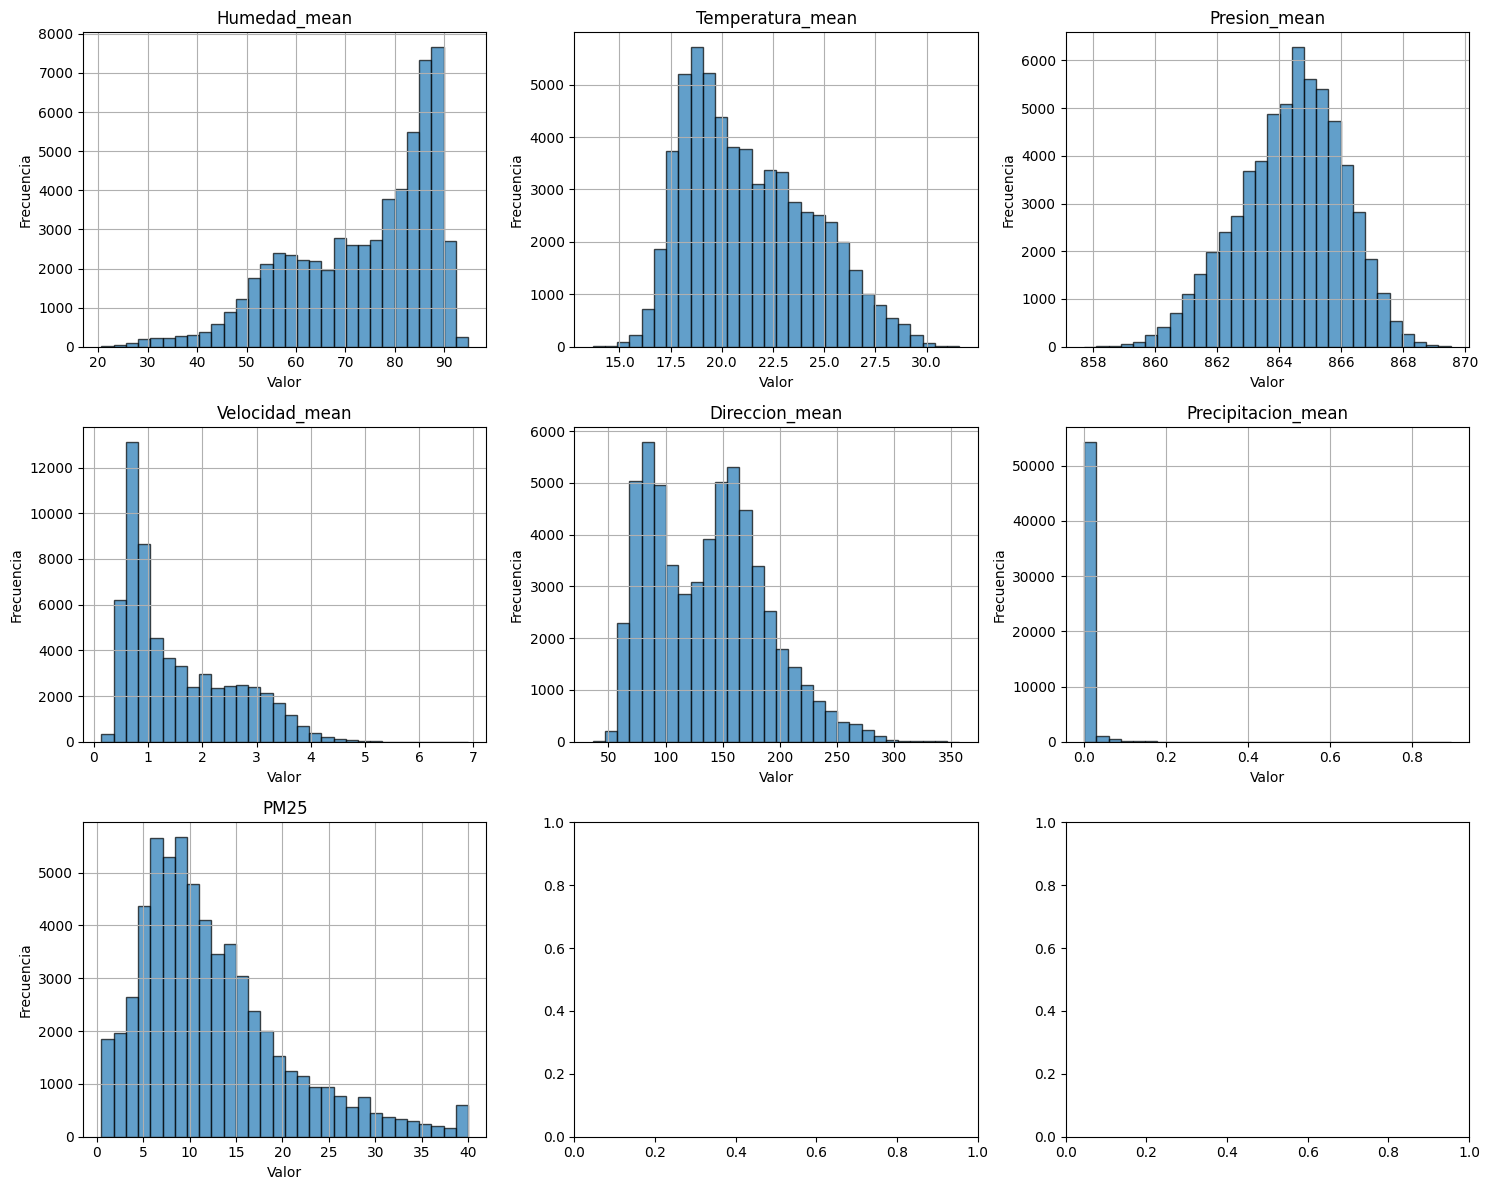

In [28]:
# Definir las columnas que queremos visualizar (excluyendo 'Fecha_Hora' ya que es una fecha)

# Crear una figura con subgráficos (ajustar tamaño según cantidad de variables)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 4 filas, 3 columnas

# Aplanar la matriz de ejes para iterar sobre ella fácilmente
axes = axes.flatten()

# Generar histogramas para cada variable
for i, col in enumerate(variables):
    if i < len(variables):  # Evitar errores si hay menos variables que subgráficos
        df_nuevo[col].dropna().astype(float).hist(ax=axes[i], bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel("Valor")
        axes[i].set_ylabel("Frecuencia")

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

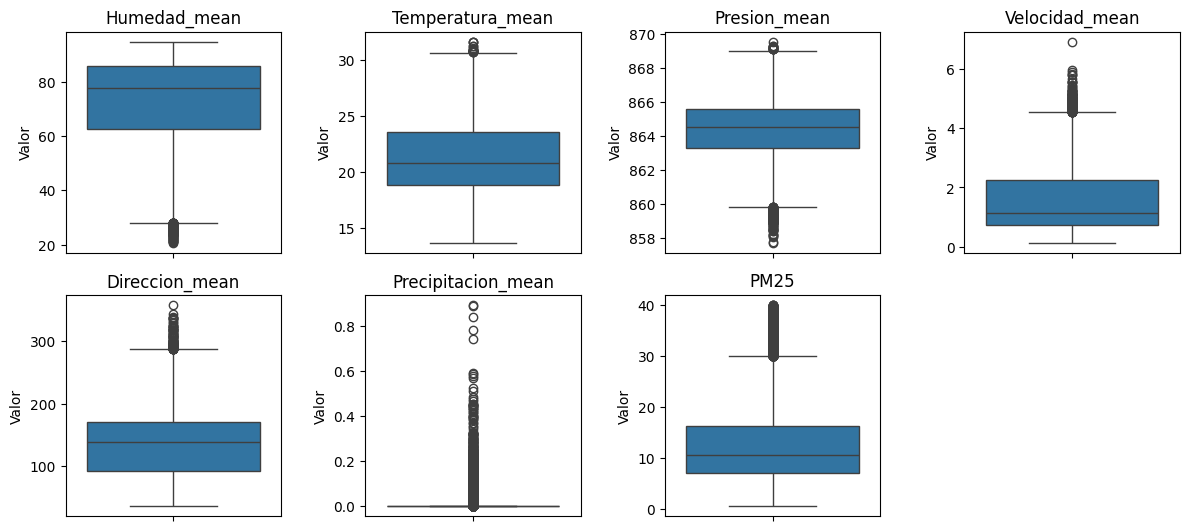

In [29]:
# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada variable
for i, col in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Organiza en una cuadrícula
    sns.boxplot(y=df_nuevo[col])  
    plt.title(col)  # Título con el nombre de la variable
    plt.ylabel('Valor')

plt.tight_layout()  # Ajusta el diseño para evitar sobreposición
plt.show()

# Análisis de autocorrelaciones

In [31]:
# Eliminar filas con fechas del año 2025
df_nuevo = df_nuevo[df_nuevo["fecha_hora"].dt.year != 2025]

In [32]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61368 entries, 0 to 61367
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fecha_hora          61368 non-null  datetime64[ns]
 1   Humedad_mean        61368 non-null  float64       
 2   Presion_mean        61368 non-null  float64       
 3   Temperatura_mean    61368 non-null  float64       
 4   Velocidad_mean      61368 non-null  float64       
 5   Direccion_mean      59152 non-null  float64       
 6   Precipitacion_mean  56312 non-null  float64       
 7   PM25                61368 non-null  float64       
 8   Año                 61368 non-null  int32         
 9   Mes                 61368 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(2)
memory usage: 4.2 MB


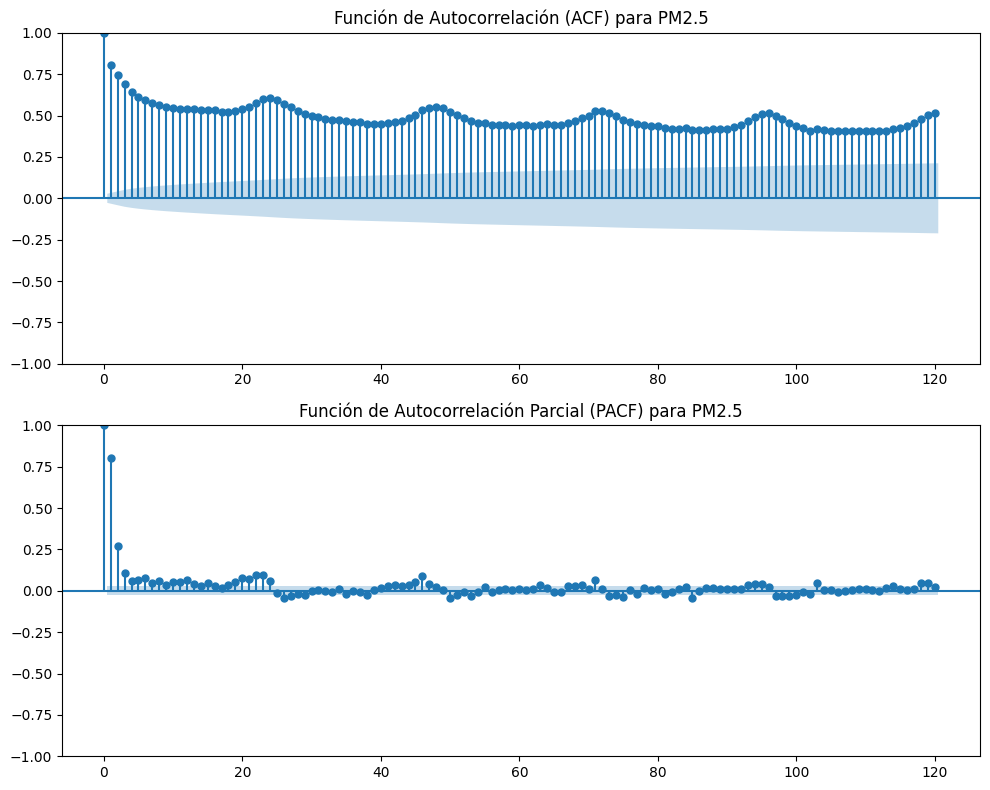

In [34]:
# Extraer la serie de PM2.5 y eliminar valores nulos
pm25 = df_nuevo["PM25"]

# Reducir la muestra si hay problemas de memoria
pm25_sampled = pm25.iloc[:5000]  # Se puede ajustar según la necesidad

# Generar gráficos de ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de ACF (Autocorrelación)
plot_acf(pm25_sampled, lags=120, ax=ax[0])
ax[0].set_title("Función de Autocorrelación (ACF) para PM2.5")

# Gráfico de PACF (Autocorrelación Parcial)
plot_pacf(pm25_sampled, lags=120, ax=ax[1])
ax[1].set_title("Función de Autocorrelación Parcial (PACF) para PM2.5")

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()

In [36]:
# Seleccionar la variable PM2.5 y reducir la muestra si es necesario
pm25 = df_nuevo["PM25"].dropna().iloc[:5000]  # Se eliminan valores nulos

# Calcular los valores de ACF y PACF
acf_values = acf(pm25, nlags=120, fft=True)  # Autocorrelación
pacf_values = pacf(pm25, nlags=120, method='ywm')  # Autocorrelación parcial

# Mostrar los valores calculados
print("Valores de ACF:", acf_values)
print("\nValores de PACF:", pacf_values)

Valores de ACF: [1.         0.80341519 0.7425411  0.68795303 0.64291481 0.61197531
 0.59324815 0.57325863 0.56349028 0.54939618 0.54355291 0.53965597
 0.54172727 0.53972307 0.53581621 0.5362468  0.5317609  0.52357095
 0.52180461 0.52678453 0.54088691 0.55440497 0.57624658 0.59793656
 0.60807001 0.59497788 0.57227735 0.55020575 0.53052715 0.51037178
 0.49896434 0.49024833 0.48133802 0.47350294 0.47194606 0.46447413
 0.46393953 0.46068425 0.45062752 0.44872478 0.44849146 0.45226473
 0.46065404 0.47005368 0.48319273 0.50230045 0.53253246 0.54632541
 0.55334162 0.54859624 0.52382036 0.50418002 0.48786557 0.46576557
 0.45478583 0.45314387 0.44355333 0.44097946 0.44048047 0.43973557
 0.44108202 0.4408364  0.4399514  0.44540724 0.44674356 0.44306278
 0.44139218 0.45283641 0.46752827 0.48633808 0.49970758 0.52639527
 0.52913556 0.51578595 0.49936179 0.47520274 0.46405513 0.44667934
 0.44345673 0.43779603 0.43518869 0.42331158 0.4193027  0.42148682
 0.42719942 0.41171297 0.41199896 0.41339608 0

## Visualización de la serie de tiempo

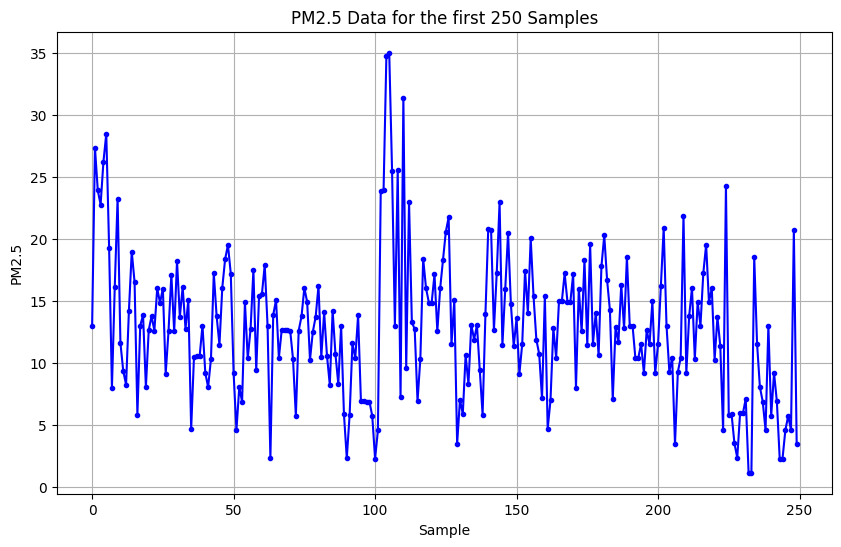

In [37]:
# Plot the PM2.5 data for the first 250 samples
plt.figure(figsize=(10, 6))
plt.plot(pm25_sampled[:250], marker='o', markersize=3, linestyle='-', color='b')
plt.title("PM2.5 Data for the first 250 Samples")
plt.xlabel("Sample")
plt.ylabel("PM2.5")
plt.grid(True)
plt.show()

In [38]:
df_nuevo.columns

Index(['fecha_hora', 'Humedad_mean', 'Presion_mean', 'Temperatura_mean',
       'Velocidad_mean', 'Direccion_mean', 'Precipitacion_mean', 'PM25', 'Año',
       'Mes'],
      dtype='object')

## Correlaciones de Spearman y Kendall

Se elige analizar la correlación entre variables con los estadísticos de Spearman y de Kendall, dado que estos son no paramétricos y no parten de la suposición de que los datos distribuyen normalmente.

In [40]:
# Spearman correlation between 'pm25' and the other columns expect 'Año' and 'Mes'
correlations_spearman = df_nuevo.drop(columns=['Año', 'Mes']).corrwith(df_nuevo['PM25'], method='spearman')

In [41]:
correlations_spearman

fecha_hora           -0.016995
Humedad_mean         -0.067851
Presion_mean          0.101936
Temperatura_mean     -0.008404
Velocidad_mean       -0.140936
Direccion_mean        0.142112
Precipitacion_mean   -0.204484
PM25                  1.000000
dtype: float64

In [43]:
correlations_kendall = df_nuevo.drop(columns=['Año', 'Mes']).corrwith(df_nuevo['PM25'], method='kendall')
correlations_kendall

fecha_hora           -0.008984
Humedad_mean         -0.047370
Presion_mean          0.068031
Temperatura_mean     -0.001927
Velocidad_mean       -0.092998
Direccion_mean        0.093761
Precipitacion_mean   -0.156273
PM25                  1.000000
dtype: float64

## Análisis de correlación entre PM2.5 y valores rezagados de otras variables

Este análisis se hace con el fin de visualizar la influencia que tienen valores previos de PM2.5, otros contaminantes y variables meteorológicas sobre los valores presentes de PM2.5

C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\68600369.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\68600369.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
C:\Users\dinue\AppData\Local\Temp\ipykernel_16408\68600369.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

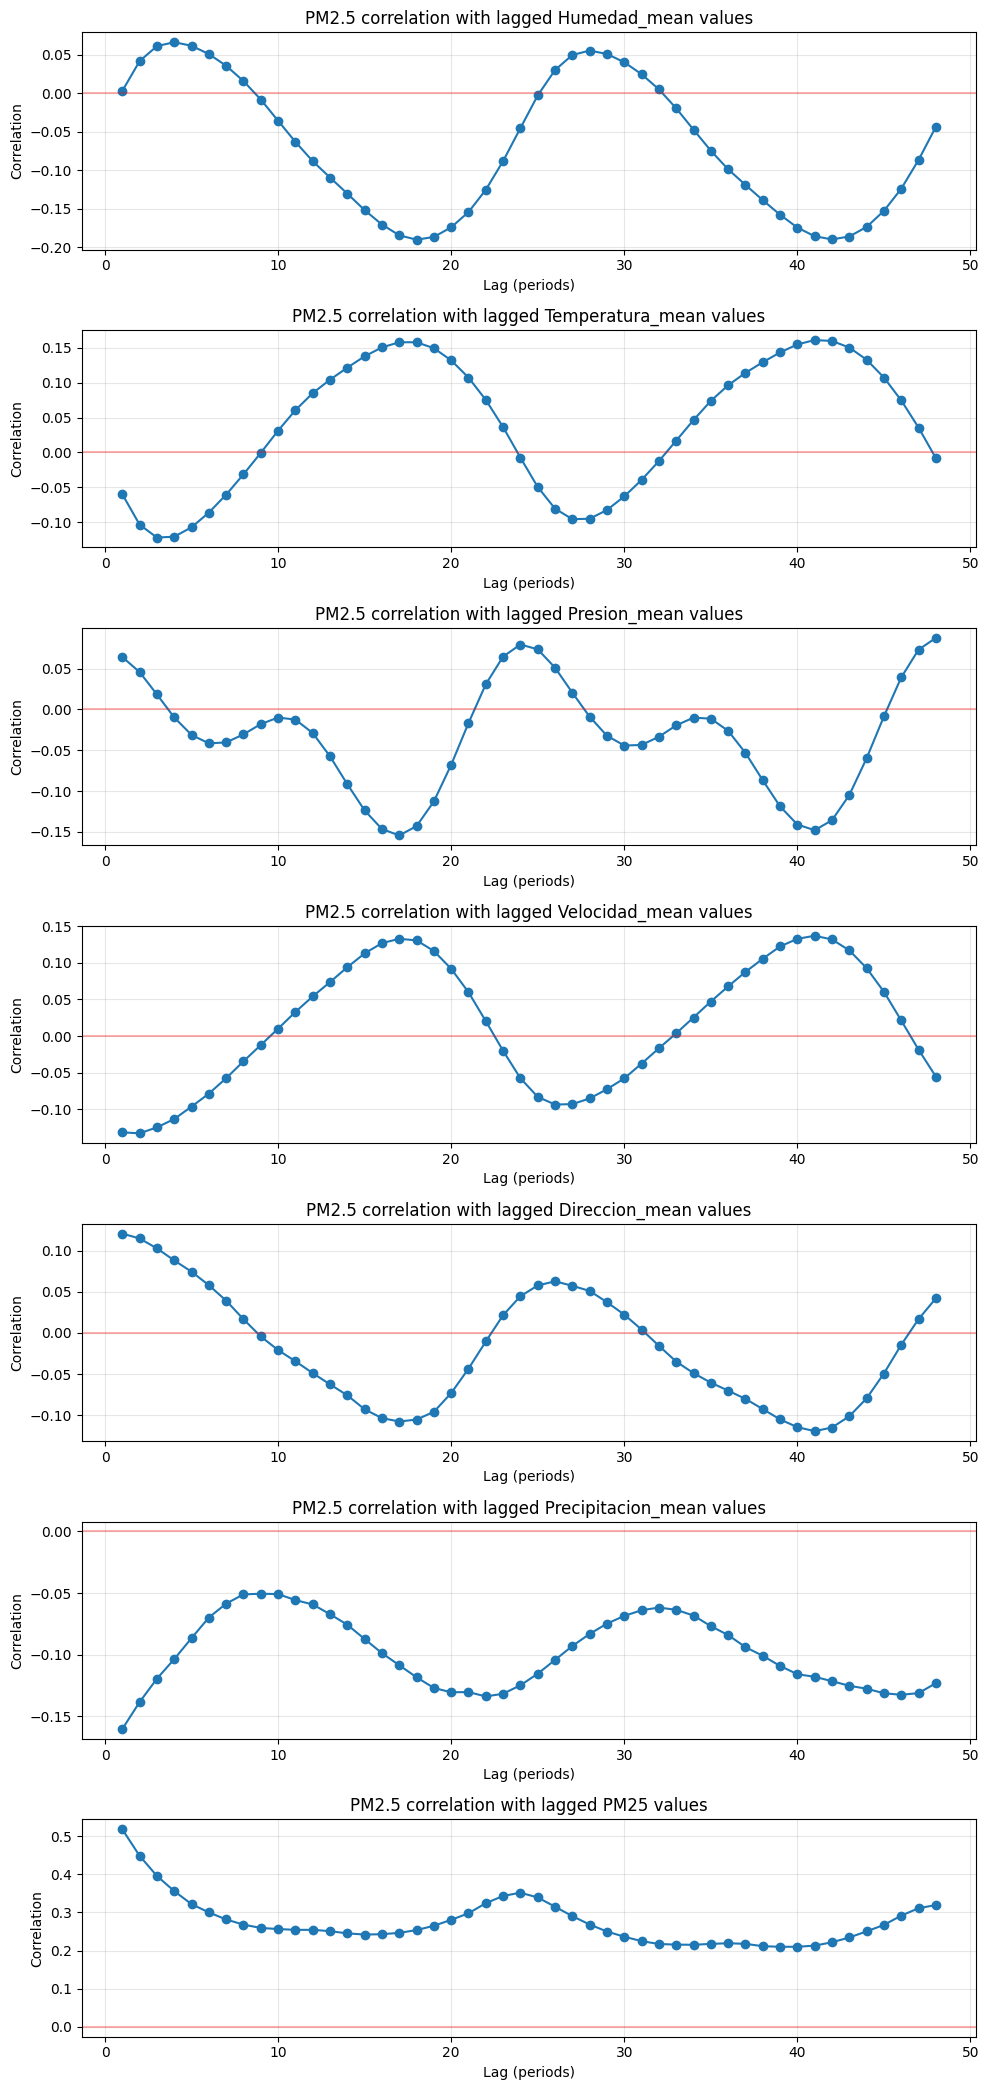

In [45]:
max_lag = 48  # Maximum lag to consider

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 3 * len(variables)))

for i, variable in enumerate(variables):
    lag_correlations = []
    for lag in range(1, max_lag + 1):
        df_nuevo[f'{variable}_lag{lag}'] = df_nuevo[variable].shift(lag)
        # Calculate correlation, ignoring NaN values
        corr = df_nuevo['PM25'].corr(df_nuevo[f'{variable}_lag{lag}'], method='kendall')
        lag_correlations.append((lag, corr))
    
    # Plot in the corresponding subplot
    lags, corrs = zip(*lag_correlations)
    axes[i].plot(lags, corrs, marker='o')
    axes[i].axhline(y=0, color='r', linestyle='-', alpha=0.3)
    axes[i].set_xlabel('Lag (periods)')
    axes[i].set_ylabel('Correlation')
    axes[i].set_title(f'PM2.5 correlation with lagged {variable} values')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clean up the lagged columns
df_nuevo.drop(columns=[f'{variable}_lag{lag}' for variable in variables for lag in range(1, max_lag + 1)], inplace=True)


Para el entrenamiento del modelo predictivo, se decide agregar al conjunto de variables de entrada el valor de estas rezagado hacia atrás de 1 a 6 horas, 12 y 24 horas

In [46]:
# Lista de columnas que quieres expandir con valores anteriores

# Agregar 6 columnas para cada variable con valores de registros anteriores
for var in variables:
    for i in [1,2,3,4,5,6,12,24]:  # 1 hasta 6 registros anteriores
        df_nuevo[f'{var}_lag{i}'] = df_nuevo[var].shift(i)

# Ver las primeras filas del dataframe con las nuevas columnas
print(df.head())

            fecha_hora  Humedad_mean  Humedad_median  Humedad_min  \
0  2018-01-01 00:00:00     88.248333           88.75         84.6   
1  2018-01-01 01:00:00     85.500000           85.30         83.4   
2  2018-01-01 02:00:00     86.633333           86.65         84.7   
3  2018-01-01 03:00:00     83.178333           83.90         78.5   
4  2018-01-01 04:00:00     82.196667           82.30         80.0   

   Humedad_max  Presion_mean  Presion_median  Presion_min  Presion_max  \
0         89.4    866.230000           866.3        865.8        866.6   
1         87.5    865.431667           865.4        865.3        865.8   
2         88.5    865.075000           865.1        864.6        865.3   
3         85.5    864.605000           864.6        864.5        864.7   
4         85.4    864.810000           864.8        864.5        865.1   

   Temperatura_mean  ...  Velocidad_max  Direccion_mean  Direccion_median  \
0         17.388333  ...            2.1      167.950000        

In [47]:
df_nuevo.columns

Index(['fecha_hora', 'Humedad_mean', 'Presion_mean', 'Temperatura_mean',
       'Velocidad_mean', 'Direccion_mean', 'Precipitacion_mean', 'PM25', 'Año',
       'Mes', 'Humedad_mean_lag1', 'Humedad_mean_lag2', 'Humedad_mean_lag3',
       'Humedad_mean_lag4', 'Humedad_mean_lag5', 'Humedad_mean_lag6',
       'Humedad_mean_lag12', 'Humedad_mean_lag24', 'Temperatura_mean_lag1',
       'Temperatura_mean_lag2', 'Temperatura_mean_lag3',
       'Temperatura_mean_lag4', 'Temperatura_mean_lag5',
       'Temperatura_mean_lag6', 'Temperatura_mean_lag12',
       'Temperatura_mean_lag24', 'Presion_mean_lag1', 'Presion_mean_lag2',
       'Presion_mean_lag3', 'Presion_mean_lag4', 'Presion_mean_lag5',
       'Presion_mean_lag6', 'Presion_mean_lag12', 'Presion_mean_lag24',
       'Velocidad_mean_lag1', 'Velocidad_mean_lag2', 'Velocidad_mean_lag3',
       'Velocidad_mean_lag4', 'Velocidad_mean_lag5', 'Velocidad_mean_lag6',
       'Velocidad_mean_lag12', 'Velocidad_mean_lag24', 'Direccion_mean_lag1',
     

In [48]:
df_nuevo.drop(['Año', 'Mes'],inplace=True, axis=1)

In [49]:
df_nuevo.to_csv('81_datos_procesados.csv', index=False)